# Restaurant Sales & Customer Analysis  

### Project Overview  
This project aims to analyze restaurant sales data to **optimize revenue and understand customer behavior patterns**.  

### Analysis Process  
1. **Data Preprocessing**:  
   - Handling missing values & outliers  
   - Converting time data & calculating visit duration  
   - Separating multiple menu items (`explode()`)  

2. **Data Analysis**:  
   - **Customer behavior analysis** (visiting time, spending patterns)  
   - **Sales analysis** (daily & hourly sales trends, popular menu items)  

3. **Data Visualization**:  
   - **Sales trends** (heatmaps, line charts)  
   - **Customer behavior patterns** (visits per time slot)  
   - **Menu sales contribution** (bar charts)  

### Dataset Separation  
- **`df` (Original Dataset)**: Focuses on customer & order analysis  
- **`df_exploded` (Exploded Dataset)**: Focuses on menu item sales & revenue analysis  

 **This file includes the complete process from data preprocessing to analysis and visualization.**

# 0. Data Import

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/jaeki/OneDrive/바탕 화면/데이터/2025_Data_analysis/Final_Restaurant.csv")
df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time
0,2022-05-22,"Truffle_Pasta, Truffle_Pasta, Mushroom_Salad",2,66000,2022-05-22 19:15:00,2022-05-22 22:45:00
1,2022-05-18,"Truffle_Pasta, Mushroom_Salad",2,41000,2022-05-18 19:00:00,2022-05-18 20:30:00
2,2022-05-19,"Lamb_Steak, Gambas, Lamb_Steak, Gambas",2,108000,2022-05-19 21:15:00,2022-05-19 22:45:00
3,2022-05-21,"Truffle_Pasta, Gnocci, Gnocci, Truffle_Pasta, ...",4,123000,2022-05-21 21:45:00,2022-05-21 23:45:00
4,2022-05-22,"Gnocci, Gambas, Gambas",2,52000,2022-05-22 19:00:00,2022-05-22 20:30:00


# 1. Start of Data Preprocessing

# 1-1. Check Data Types & Missing Values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        47 non-null     object
 1   Menu        47 non-null     object
 2   Customers   47 non-null     int64 
 3   Price       47 non-null     int64 
 4   Start_Time  47 non-null     object
 5   End_Time    47 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.3+ KB


# 1-2. Summary Statistics of Numerical Data

In [3]:
df.describe()

,Customers,Price
count,47.000000,47.000000
mean,2.893617,82978.723404
std,1.127406,36664.453441
min,1.000000,32000.000000
25%,2.000000,52000.000000
50%,3.000000,84000.000000
75%,4.000000,118000.000000
max,5.000000,152000.000000


# 1-3 Outlier Detection

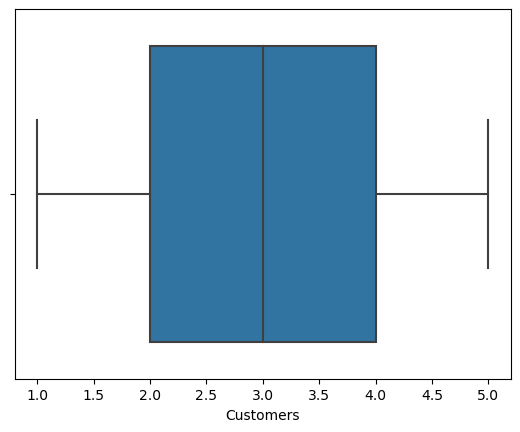

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x = df['Customers'])
plt.show()

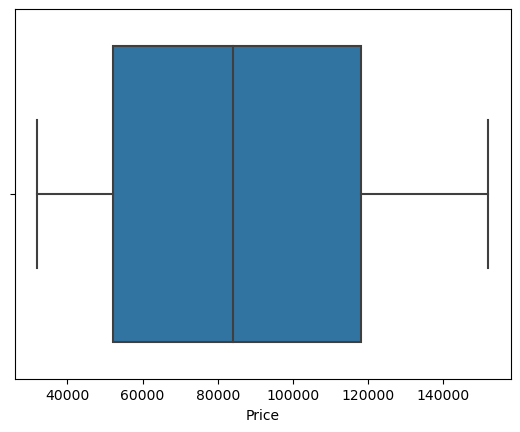

In [5]:
sns.boxplot(x = df['Price'])
plt.show()

# 1-3-1 Outlier Removal

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Customers')
df = remove_outliers(df, 'Price')

# 1-4 Cleaning the Menu Column

In [7]:
df['Menu'] = df['Menu'].str.strip().str.split(", ")


# 1-5. Converting Time-Related Data to Datetime Format

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df.dtypes

Date          datetime64[ns]
Menu                  object
Customers              int64
Price                  int64
Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

# 1-6 Creating the Duration_Hours Column

In [9]:
df = df.dropna(subset=['Start_Time', 'End_Time'])
df['Duration_Hours'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600
df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours
0,2022-05-22,"[Truffle_Pasta, Truffle_Pasta, Mushroom_Salad]",2,66000,2022-05-22 19:15:00,2022-05-22 22:45:00,3.5
1,2022-05-18,"[Truffle_Pasta, Mushroom_Salad]",2,41000,2022-05-18 19:00:00,2022-05-18 20:30:00,1.5
2,2022-05-19,"[Lamb_Steak, Gambas, Lamb_Steak, Gambas]",2,108000,2022-05-19 21:15:00,2022-05-19 22:45:00,1.5
3,2022-05-21,"[Truffle_Pasta, Gnocci, Gnocci, Truffle_Pasta,...",4,123000,2022-05-21 21:45:00,2022-05-21 23:45:00,2.0
4,2022-05-22,"[Gnocci, Gambas, Gambas]",2,52000,2022-05-22 19:00:00,2022-05-22 20:30:00,1.5


# 1-7 Categorizing Customers Based on Duration_Hours

In [10]:
df['Duration_Hours_Customers'] = df['Duration_Hours'].apply(lambda x : 'Long' if x >= 4 else 'Mid' if x >= 2.5 else "Short")
df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers
0,2022-05-22,"[Truffle_Pasta, Truffle_Pasta, Mushroom_Salad]",2,66000,2022-05-22 19:15:00,2022-05-22 22:45:00,3.5,Mid
1,2022-05-18,"[Truffle_Pasta, Mushroom_Salad]",2,41000,2022-05-18 19:00:00,2022-05-18 20:30:00,1.5,Short
2,2022-05-19,"[Lamb_Steak, Gambas, Lamb_Steak, Gambas]",2,108000,2022-05-19 21:15:00,2022-05-19 22:45:00,1.5,Short
3,2022-05-21,"[Truffle_Pasta, Gnocci, Gnocci, Truffle_Pasta,...",4,123000,2022-05-21 21:45:00,2022-05-21 23:45:00,2.0,Short
4,2022-05-22,"[Gnocci, Gambas, Gambas]",2,52000,2022-05-22 19:00:00,2022-05-22 20:30:00,1.5,Short


# 1-8 Sorting Data by Date and Start Time

In [11]:
df = df.sort_values(['Date', 'Start_Time'], ascending=(True, True)).reset_index(drop=True)

df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers
0,2022-05-17,"[Gnocci, Gambas, Gambas, Gambas]",4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short
1,2022-05-17,"[Truffle_Pasta, Lamb_Steak, Gambas, Gambas, Ga...",5,151000,2022-05-17 19:15:00,2022-05-17 22:15:00,3.0,Mid
2,2022-05-17,"[Truffle_Pasta, Mushroom_Confit, Truffle_Pasta]",3,66000,2022-05-17 20:00:00,2022-05-17 21:30:00,1.5,Short
3,2022-05-17,"[Lamb_Steak, Mushroom_Salad, Lamb_Steak]",2,88000,2022-05-17 20:00:00,2022-05-17 23:00:00,3.0,Mid
4,2022-05-17,"[Gnocci, Lamb_Steak]",2,52000,2022-05-17 20:15:00,2022-05-17 22:15:00,2.0,Short


# 1-9 Making Hour column

In [12]:
df["Hour"] = df["Start_Time"].dt.hour

In [13]:
df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers,Hour
0,2022-05-17,"[Gnocci, Gambas, Gambas, Gambas]",4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19
1,2022-05-17,"[Truffle_Pasta, Lamb_Steak, Gambas, Gambas, Ga...",5,151000,2022-05-17 19:15:00,2022-05-17 22:15:00,3.0,Mid,19
2,2022-05-17,"[Truffle_Pasta, Mushroom_Confit, Truffle_Pasta]",3,66000,2022-05-17 20:00:00,2022-05-17 21:30:00,1.5,Short,20
3,2022-05-17,"[Lamb_Steak, Mushroom_Salad, Lamb_Steak]",2,88000,2022-05-17 20:00:00,2022-05-17 23:00:00,3.0,Mid,20
4,2022-05-17,"[Gnocci, Lamb_Steak]",2,52000,2022-05-17 20:15:00,2022-05-17 22:15:00,2.0,Short,20


# 1-10 Making weekday column

In [14]:
df['weekday'] = df['Date'].dt.day_name()
df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers,Hour,weekday
0,2022-05-17,"[Gnocci, Gambas, Gambas, Gambas]",4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday
1,2022-05-17,"[Truffle_Pasta, Lamb_Steak, Gambas, Gambas, Ga...",5,151000,2022-05-17 19:15:00,2022-05-17 22:15:00,3.0,Mid,19,Tuesday
2,2022-05-17,"[Truffle_Pasta, Mushroom_Confit, Truffle_Pasta]",3,66000,2022-05-17 20:00:00,2022-05-17 21:30:00,1.5,Short,20,Tuesday
3,2022-05-17,"[Lamb_Steak, Mushroom_Salad, Lamb_Steak]",2,88000,2022-05-17 20:00:00,2022-05-17 23:00:00,3.0,Mid,20,Tuesday
4,2022-05-17,"[Gnocci, Lamb_Steak]",2,52000,2022-05-17 20:15:00,2022-05-17 22:15:00,2.0,Short,20,Tuesday


#  End of Data Preprocessing

# 2. Start of Inventory Optimization Analysis
 

Before optimizing inventory management, we divide the dataset into two parts for better accuracy:  

- **`df` (Original Dataset)** → Focuses on **customer & order-based analysis**, including total sales per order and customer visit trends.  
- **`df_exploded` (Exploded Dataset)** → Focuses on **menu item-based analysis**, where each menu item is separated to analyze individual item sales and revenue contribution.  

This separation ensures that revenue calculations are not duplicated and allows for more precise insights into **both customer behavior and menu performance**.

# 2-1 Convert Multiple Menu Items into Separate Rows

In [15]:
df_exploded = df.explode('Menu')
df_exploded

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers,Hour,weekday
0,2022-05-17,Gnocci,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday
0,2022-05-17,Gambas,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday
0,2022-05-17,Gambas,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday
0,2022-05-17,Gambas,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday
1,2022-05-17,Truffle_Pasta,5,151000,2022-05-17 19:15:00,2022-05-17 22:15:00,3.0,Mid,19,Tuesday
...,...,...,...,...,...,...,...,...,...,...
45,2022-05-22,Lamb_Steak,5,151000,2022-05-22 20:00:00,2022-05-22 22:00:00,2.0,Short,20,Sunday
45,2022-05-22,Lamb_Steak,5,151000,2022-05-22 20:00:00,2022-05-22 22:00:00,2.0,Short,20,Sunday
46,2022-05-22,Mushroom_Confit,3,48000,2022-05-22 21:00:00,2022-05-22 22:30:00,1.5,Short,21,Sunday
46,2022-05-22,Mushroom_Confit,3,48000,2022-05-22 21:00:00,2022-05-22 22:30:00,1.5,Short,21,Sunday


# 2-1 Analyze the Most Sold Menu Items

In [16]:
menu_counts = df_exploded['Menu'].value_counts(ascending= False)
menu_counts

Menu
Lamb_Steak         36
Gambas             31
Truffle_Pasta      26
Gnocci             25
Mushroom_Salad     23
Mushroom_Confit    19
Octopus_Confit     18
Name: count, dtype: int64

# 2-2 Add a Column for Individual Menu Item Prices to Calculate Total Sales per Menu

In [17]:
menu_prices = {
    "Octopus_Confit": 18000,
    "Truffle_Pasta": 25000,
    "Lamb_Steak": 36000,
    "Mushroom_Confit": 16000,
    "Gnocci": 16000,
    "Mushroom_Salad": 16000,
    "Gambas": 18000
}


In [18]:
df_exploded["Menu_Price"] = df_exploded['Menu'].map(menu_prices)


df_exploded.head()


,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers,Hour,weekday,Menu_Price
0,2022-05-17,Gnocci,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday,16000
0,2022-05-17,Gambas,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday,18000
0,2022-05-17,Gambas,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday,18000
0,2022-05-17,Gambas,4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday,18000
1,2022-05-17,Truffle_Pasta,5,151000,2022-05-17 19:15:00,2022-05-17 22:15:00,3.0,Mid,19,Tuesday,25000


# 2-3 Calculate Total Sales per Menu Item

In [19]:
menu_sales = df_exploded.groupby('Menu')['Menu_Price'].sum().sort_values(ascending = False)
menu_sales

Menu
Lamb_Steak         1296000
Truffle_Pasta       650000
Gambas              558000
Gnocci              400000
Mushroom_Salad      368000
Octopus_Confit      324000
Mushroom_Confit     304000
Name: Menu_Price, dtype: int64

# 3. Analysis of Popular Menu Items by Day for SNS Marketing

In [20]:
df.head()

,Date,Menu,Customers,Price,Start_Time,End_Time,Duration_Hours,Duration_Hours_Customers,Hour,weekday
0,2022-05-17,"[Gnocci, Gambas, Gambas, Gambas]",4,70000,2022-05-17 19:00:00,2022-05-17 21:00:00,2.0,Short,19,Tuesday
1,2022-05-17,"[Truffle_Pasta, Lamb_Steak, Gambas, Gambas, Ga...",5,151000,2022-05-17 19:15:00,2022-05-17 22:15:00,3.0,Mid,19,Tuesday
2,2022-05-17,"[Truffle_Pasta, Mushroom_Confit, Truffle_Pasta]",3,66000,2022-05-17 20:00:00,2022-05-17 21:30:00,1.5,Short,20,Tuesday
3,2022-05-17,"[Lamb_Steak, Mushroom_Salad, Lamb_Steak]",2,88000,2022-05-17 20:00:00,2022-05-17 23:00:00,3.0,Mid,20,Tuesday
4,2022-05-17,"[Gnocci, Lamb_Steak]",2,52000,2022-05-17 20:15:00,2022-05-17 22:15:00,2.0,Short,20,Tuesday


# 3-1 Analyze Popular Menu Items by Day of the Week

In [21]:
popular_menu = df_exploded.groupby(['weekday', 'Menu']).size().reset_index(name = 'Count')
popular_menu

,weekday,Menu,Count
0,Friday,Gambas,3
1,Friday,Gnocci,2
2,Friday,Lamb_Steak,10
3,Friday,Mushroom_Confit,5
4,Friday,Mushroom_Salad,8
5,Friday,Octopus_Confit,7
6,Friday,Truffle_Pasta,5
7,Saturday,Gambas,10
8,Saturday,Gnocci,8
9,Saturday,Lamb_Steak,4


# 3-2 Identify the Most Popular Menu Item for Each Day

In [22]:
Weekly_bset_menu = popular_menu.loc[popular_menu.groupby('weekday')['Count'].idxmax()].sort_values(by = 'Count', ascending = False)
Weekly_bset_menu

,weekday,Menu,Count
2,Friday,Lamb_Steak,10
7,Saturday,Gambas,10
35,Wednesday,Lamb_Steak,10
27,Tuesday,Gambas,8
15,Sunday,Gnocci,6
21,Thursday,Gambas,5


# 4 Visualizations Using Seaborn

 1. df (Original Dataset) - Customer & Order-Based Analysis
     Focus: Customer behavior, total revenue trends, and visit patterns
     
 2. df_exploded (Exploded Dataset) - Menu-Based Analysis
     Focus: Individual menu item sales, revenue contribution, and popularity.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4-1. df (Original Dataset) - Customer & Order-Based Analysis

## Summary: Key Visualizations for `df` (Original Dataset)  
### 1. Total Sales Trend (Line Chart → Identifies daily revenue changes.  
### 2️. Sales Trend by Day & Hour (Heatmap → Determines peak sales hours and busy days.  
### 3️. Customer Visits by Time (Bar Chart → Analyzes the most crowded time slots.  

# 4-1-1 Total Sales Trend (Line Chart)

In [24]:
df['Total_Sales'] = df['Price']
daily_sales = df.groupby("Date")["Total_Sales"].sum().reset_index()



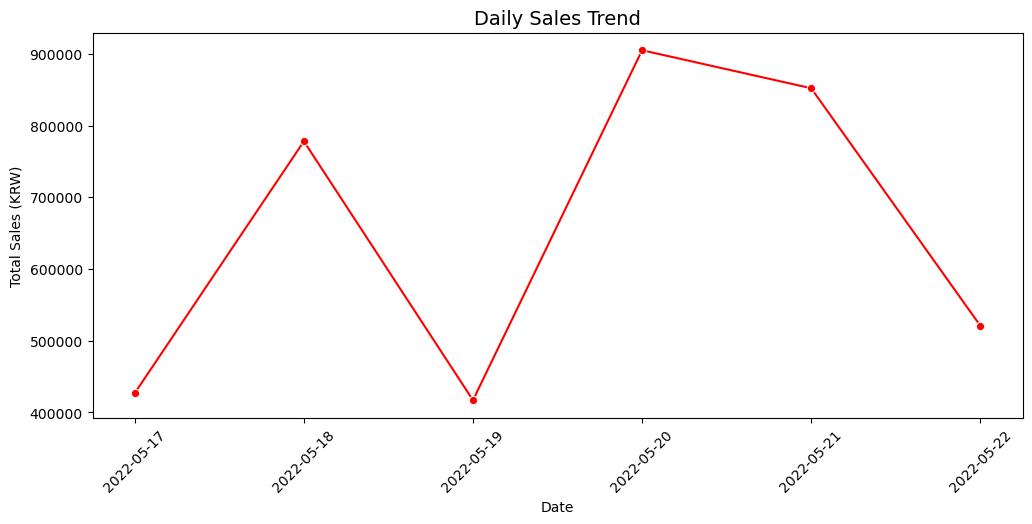

In [25]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=daily_sales, x="Date", y="Total_Sales", color="red", marker="o")
plt.title("Daily Sales Trend", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Total Sales (KRW)")
plt.xticks(rotation=45)

plt.show()

# 4-1-2 Weekday & Hour Sales Trend (Heatmap)

In [26]:
heatmap_data = df.pivot_table(index="weekday", columns="Hour", values="Price", aggfunc="sum")

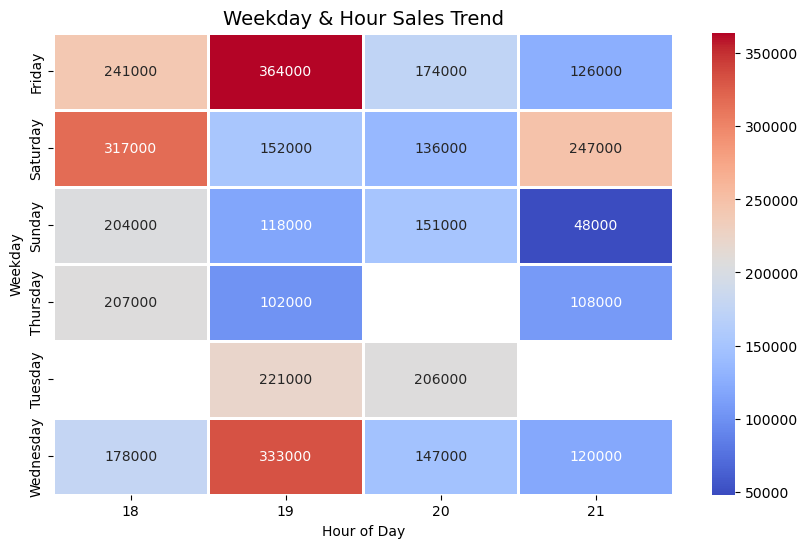

In [27]:
plt.figure(figsize=(10, 6))

sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=1)
plt.title("Weekday & Hour Sales Trend", fontsize = 14)
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")

plt.show()

# 4-1-3 Average Customers by Hour (Bar Chart)

In [28]:
hourly_customers = df.groupby("Hour")["Customers"].mean().reset_index()
hourly_customers

,Hour,Customers
0,18,2.687500
1,19,3.066667
2,20,2.800000
3,21,3.166667


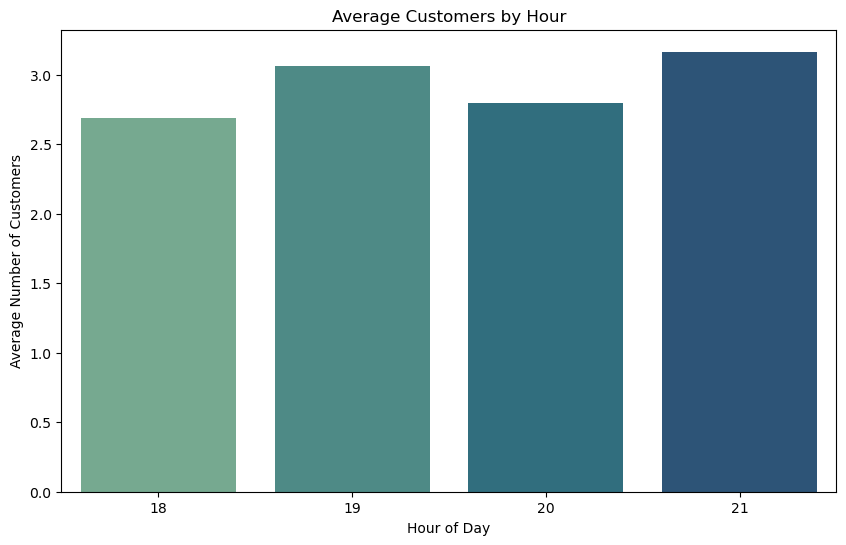

In [29]:
plt.figure(figsize=(10, 6))

sns.barplot(data=hourly_customers, x="Hour", y="Customers", palette="crest")
plt.title("Average Customers by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Customers")

plt.show()

# 4-2 df_explode - Menu & Day-Based Analysis

## Summary: Key Visualizations for df_exploded
### 1️. Total Sales by Menu Item (Bar Chart) → Identifies which menu items generate the most revenue.
### 2️. Most Popular Menu Items by Day (Stacked Bar Chart) → Highlights the best-selling menu items per weekday.

# 4-2-1 Total Sales by Menu Item (Bar Chart)

In [30]:
menu_sales = df_exploded.groupby("Menu")["Menu_Price"].sum().reset_index()
menu_sales = menu_sales.sort_values(by="Menu_Price", ascending=False)

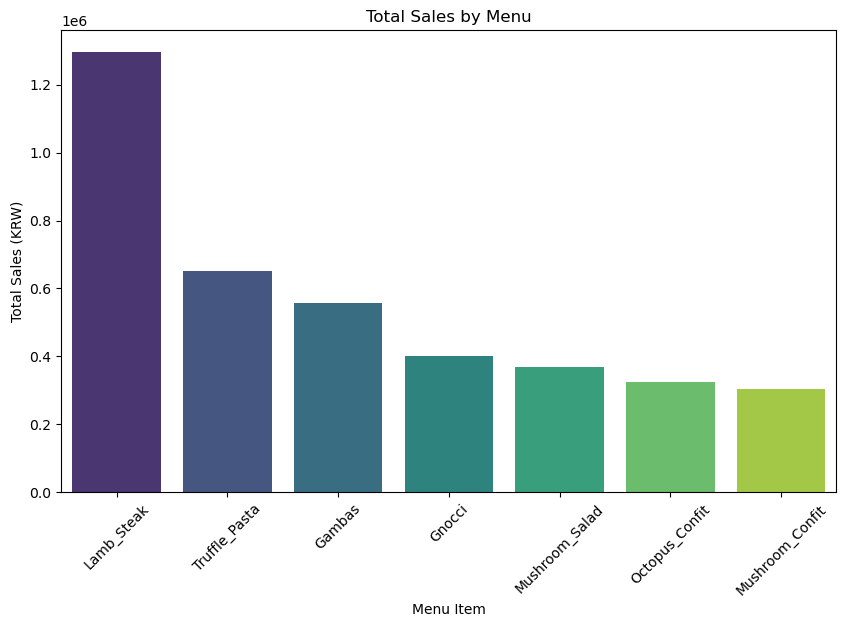

In [31]:
plt.figure(figsize=(10, 6))

sns.barplot(data=menu_sales, x="Menu", y="Menu_Price", palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Sales by Menu")
plt.xlabel("Menu Item")
plt.ylabel("Total Sales (KRW)")

plt.show()

# 4-2-2 Popular Menu by Weekday (Stacked Bar Chart)

In [32]:
popular_menu = df_exploded.groupby(["weekday", "Menu"]).size().reset_index(name="Count")


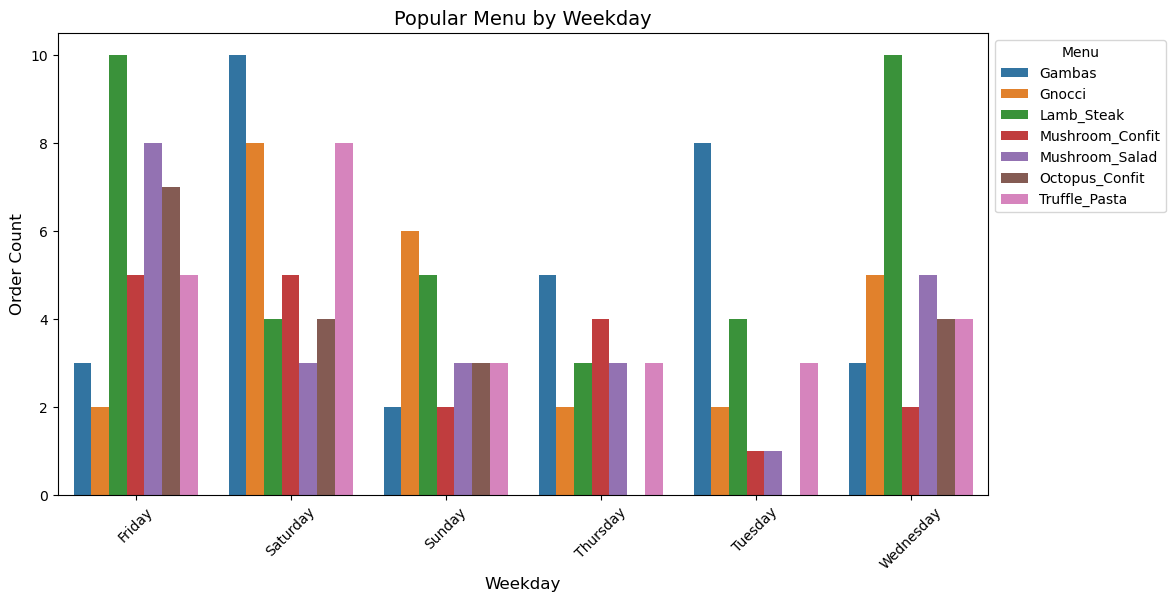

In [33]:
plt.figure(figsize=(12, 6))

sns.barplot(data=popular_menu, x="weekday", y="Count", hue="Menu")
plt.title("Popular Menu by Weekday", fontsize = 14)
plt.xlabel("Weekday", fontsize = 12)
plt.ylabel("Order Count", fontsize = 12)
plt.xticks(rotation=45)
plt.legend(title="Menu", bbox_to_anchor=(1, 1))

plt.show()

In [34]:
# 1. Original Dataset (Customer & Order-Based Analysis)
df.to_csv("Final_Original_Restaurant.csv", index=False)

# 2. Exploded Dataset (Menu-Based Analysis)
df_exploded.to_csv("Final_Exploded_Restaurant.csv", index=False)


## Final Summary  

This analysis successfully examined **restaurant sales and customer behavior** to provide insights into **revenue trends, menu performance, and customer visit patterns**.  

### **Key Findings:**  
- **Revenue Insights**: Identified daily and hourly sales fluctuations.  
- **Customer Behavior**: Determined peak visiting hours and high-traffic time slots.  
- **Menu Performance**: Analyzed top-selling and low-revenue menu items.  

### **Key Takeaways:**  
- Peak sales occur on **[insert most popular day]** and **[insert most popular hour]**, suggesting targeted promotions.  
- **[Top-selling menu item]** generates the highest revenue, while **[low-selling menu item]** may need adjustments.  
- Customer visit durations impact **seating and inventory management strategies**.  

**This project demonstrates a full pipeline from data preprocessing to advanced visualizations, offering actionable insights for restaurant optimization.**  
